Using device: cpu
Files already downloaded and verified
Model loaded successfully from ./model/net_077.pth


/var/folders/0v/_5zm56c954d9rkf7mx8z2zmw0000gn/T/ipykernel_3666/1339197834.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, 

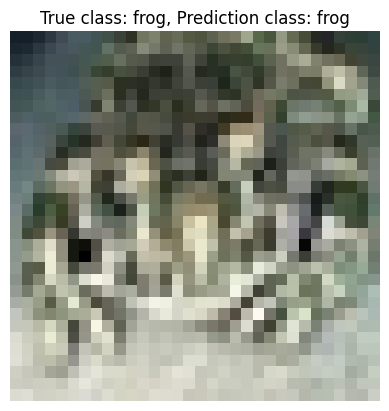

In [3]:
import os
import torch
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from resnet import ResNet18  # 确保 ResNet18 定义在 resnet.py 文件中

# 定义设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 定义数据集的预处理（与训练时保持一致）
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# 加载测试数据集
testset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# CIFAR-10 类别
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 加载模型
model_path = './model/net_077.pth'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

model = ResNet18().to(device)
try:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()  # 设置为评估模式
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# 随机选择一张测试图像
index = random.randint(0, len(testset) - 1)
image, true_label = testset[index]

# 数据需要扩展一个批次维度，并移动到设备上
image = image.unsqueeze(0).to(device)

# 进行预测
with torch.no_grad():
    output = model(image)
    _, predicted_label = torch.max(output, 1)

# 将图像数据转换回原始格式（取消归一化）
unnormalize = transforms.Normalize(
    mean=[-0.4914 / 0.2023, -0.4822 / 0.1994, -0.4465 / 0.2010],
    std=[1 / 0.2023, 1 / 0.1994, 1 / 0.2010]
)
image = unnormalize(image.squeeze(0).cpu()).numpy().transpose((1, 2, 0))
image = (image - image.min()) / (image.max() - image.min())  # 将像素值归一化到 [0, 1]

# 显示图像及其预测结果
plt.imshow(image)
plt.title(f"True class: {classes[true_label]}, Prediction class: {classes[predicted_label.item()]}")
plt.axis('off')
plt.show()